In [17]:
import numpy as np

from utils.loadData import loadDataWithNews
from lstm.preprocessing import dataToTimeSeriesMultiDimensional, getDatasetsMultiDimensionalBaseline, normalizeAtOnce
from lstm.model import getModelBaseline, evaluateModelQuick, evaluateFinal
from lstm.visualization import visualize_loss, show_batch, show_data_simple, showRegressionExampleMultiDimensional
from lstm.callbacks import es_callback, modelckpt_callback

In [18]:
df = loadDataWithNews()

In [19]:
features = df.loc[:, df.columns != 'Date']
features = features.loc[:, features.columns != 'Unnamed: 0']
features = features.loc[:, features.columns != 'Adj Close']
features.head()

,Open,High,Low,Close,Volume,positive,neutral,negative
0,21308.351563,23642.660156,21234.675781,22805.162109,71378606374,2,3,0
1,22806.796875,23238.601563,22399.812500,23137.960938,40387896275,3,2,0
2,23132.865234,24085.855469,22826.472656,23869.832031,38487546580,0,1,0
3,23861.765625,24209.660156,23147.710938,23477.294922,37844228422,1,2,0
4,23474.455078,24059.982422,22159.367188,22803.082031,45852713981,3,3,0


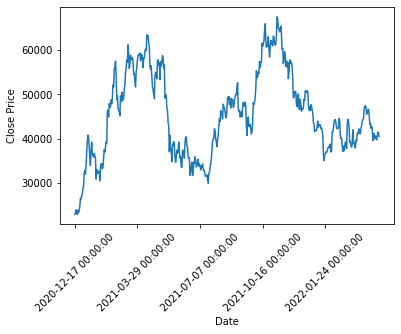

In [20]:
normalized_data, scaler = normalizeAtOnce(features.iloc[:,:-3])
normalized_data = np.concatenate([normalized_data, features.iloc[:,-3:]], axis=1)
show_data_simple(features["Close"], df["Date"])

In [21]:
config = {
    "past": 10,
    "future": 10,
    "neurons": 50,
    "batch_size": 64,
    "epochs": 100,
    "features": normalized_data.shape[1]
}

x_train = normalized_data[:-1]
y_train = normalized_data[1:, 3]
print(x_train.shape, y_train.shape)

(486, 8) (486,)


In [22]:
model = getModelBaseline(config)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
1/4 [======>.......................] - ETA: 2s - loss: 1.2152 - rmse: 1.1024 - mae: 0.8797 - mape: 699.2365
Epoch 1: val_loss did not improve from 0.09279
4/4 [==============================] - 1s 109ms/step - loss: 1.1610 - rmse: 1.0775 - mae: 0.8507 - mape: 7896311.0000 - val_loss: 2.7521 - val_rmse: 1.6589 - val_mae: 1.3023 - val_mape: 283.3335
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 1.0244 - rmse: 1.0121 - mae: 0.8196 - mape: 12331167.0000
Epoch 2: val_loss did not improve from 0.09279
4/4 [==============================] - 0s 36ms/step - loss: 1.1050 - rmse: 1.0512 - mae: 0.8332 - mape: 4068359.2500 - val_loss: 2.6164 - val_rmse: 1.6175 - val_mae: 1.2686 - val_mape: 276.4645
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 1.2098 - rmse: 1.0999 - mae: 0.8508 - mape: 441.1927
Epoch 3: val_loss did not improve from 0.09279
4/4 [==============================] - 0s 30ms/step - loss: 1.0592 - rmse: 1.0292 - mae: 0.7991 - mape: 7

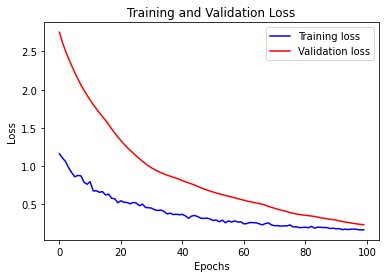

In [23]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=config["epochs"],
    validation_split=0.8,
    callbacks=[es_callback, modelckpt_callback],
)
visualize_loss(history)